In [1]:
from GOAT_functions import *
import pandas as pd

players, teams, finals = load_csvs(
    "NBA_PLAYERS.csv",
    "NBA_TEAMS.csv",
    "NBA Finals and MVP.csv"
)
GOATS_IDS = {
    "Michael Jordan": 893,
    "Kobe Bryant": 977,
    "LeBron James": 2544
}

championships_df = pd.DataFrame({
    "PLAYER_NAME": ["Michael Jordan", "Kobe Bryant", "LeBron James"],
    "CHAMPIONSHIPS": [6, 5, 4]
})

career_df = build_career_df(GOATS_IDS)


career_df = add_per_minute_stats(career_df, ["PTS", "REB", "AST", "STL", "BLK"])
career_df = add_per_36_stats(career_df, ["PTS", "REB", "AST", "STL", "BLK"])

metrics = prepare_metrics_df(career_df)

cols_to_scale = [
    "PTS_PER_36",
    "REB_PER_36",
    "AST_PER_36",
    "STL_PER_36",
    "BLK_PER_36",
    "FG_PCT",
    "FG3_PCT",
    "FT_PCT"
]
metrics = scale_metrics(metrics, cols_to_scale)


weights = {
    "PTS_PER_36": 0.25,
    "REB_PER_36": 0.15,
    "AST_PER_36": 0.15,
    "STL_PER_36": 0.05,
    "BLK_PER_36": 0.05,
    "FG_PCT": 0.15,
    "FG3_PCT": 0.10,
    "FT_PCT": 0.10}

metrics = compute_goat_index(metrics, weights)
metrics = add_championships(metrics, championships_df)
metrics = compute_final_index(metrics)


ranking = career_ranking(metrics)
ranking = ranking.reset_index(drop=True)
ranking.index += 1
ranking.index.name = "RANK"
ranking




,PLAYER_NAME,PTS_PER_36,REB_PER_36,AST_PER_36,STL_PER_36,BLK_PER_36,FG_PCT,FG3_PCT,FT_PCT,GOAT_INDEX,CHAMPIONSHIPS_NORM,GOAT_INDEX_FINAL
RANK,,,,,,,,,,,,
1,Michael Jordan,0.689461,0.364217,0.251802,0.627818,0.436107,0.623285,0.412862,0.817406,0.534484,1.000000,0.581036
2,LeBron James,0.543325,0.678678,0.548664,0.235812,0.353792,0.719784,0.586129,0.349325,0.550926,0.666667,0.562500
3,Kobe Bryant,0.429307,0.214992,0.229766,0.248354,0.206429,0.399043,0.504620,0.837192,0.390817,0.833333,0.435069


In [2]:
ranking.to_csv(
    "goat_ranking_final.csv",
    index=False
)

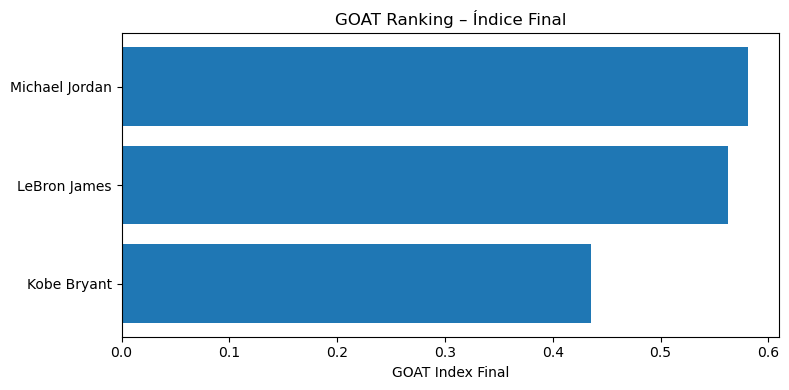

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

plt.barh(
    ranking["PLAYER_NAME"],
    ranking["GOAT_INDEX_FINAL"]
)

plt.xlabel("GOAT Index Final")
plt.title("GOAT Ranking – Índice Final")


plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


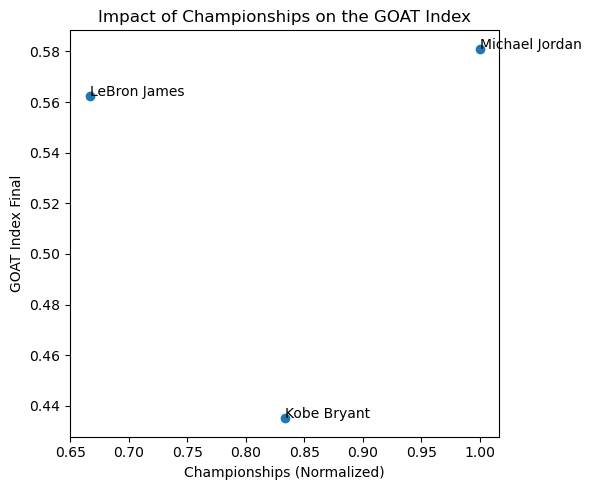

In [4]:


plt.figure(figsize=(6, 5))

plt.scatter(
    ranking["CHAMPIONSHIPS_NORM"],
    ranking["GOAT_INDEX_FINAL"]
)

for i in range(len(ranking)):
    plt.text(
        ranking["CHAMPIONSHIPS_NORM"].iloc[i],
        ranking["GOAT_INDEX_FINAL"].iloc[i],
        ranking["PLAYER_NAME"].iloc[i]
    )

plt.xlabel("Championships (Normalized)")
plt.ylabel("GOAT Index Final")
plt.title("Impact of Championships on the GOAT Index")

plt.tight_layout()
plt.show()


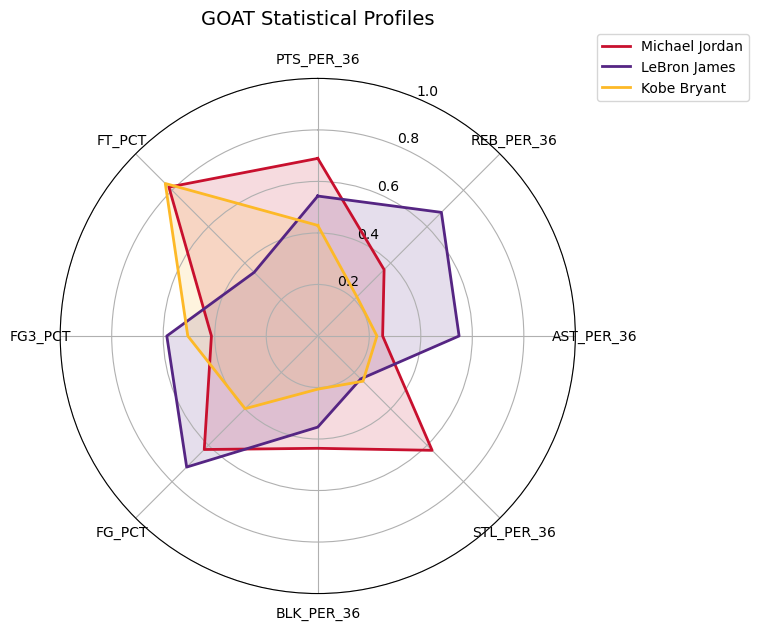

In [5]:
import numpy as np
import matplotlib.pyplot as plt


radar_metrics = [
    "PTS_PER_36",
    "REB_PER_36",
    "AST_PER_36",
    "STL_PER_36",
    "BLK_PER_36",
    "FG_PCT",
    "FG3_PCT",
    "FT_PCT"
]


colors = {
    "Michael Jordan": "#C8102E",  # Bulls red
    "Kobe Bryant": "#FDB927",     # Lakers gold
    "LeBron James": "#552583"     # Lakers purple
}

radar_df = ranking.set_index("PLAYER_NAME")[radar_metrics]

labels = radar_metrics
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # cerrar el círculo



fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_ylim(0, 1)


for player in radar_df.index:
    values = radar_df.loc[player].tolist()
    values += values[:1]

    ax.plot(
        angles,
        values,
        linewidth=2,
        label=player,
        color=colors[player]
    )

    ax.fill(
        angles,
        values,
        color=colors[player],
        alpha=0.15
    )


ax.set_title(
    "GOAT Statistical Profiles",
    size=14,
    pad=20
)

plt.legend(
    loc="upper right",
    bbox_to_anchor=(1.35, 1.1)
)

plt.tight_layout()

